# Data Science Module 122
## Hypothesis Testing - Chi-Square Tests

#Objectives

* Expain the purpose of a chi-square test and identify applications
* Use a chi-square test for independence to test for a statistically significant association between two categorical variables
* Use a chi-square test p-value to draw the correct conclusion about the null and alternative hypothesis


#Objective - Explain the purpose of a chi-square test and identify applications

#Objective - Use a chi-square test for independence to draw the correct conclusions about the null and alternative hypothesis

## Prepare 
In the last lecture, we learned about the t-test, which allows you to weigh evidence for or against the claim that mean of a population is equal to a reference value (the null hypothesis).

T-tests are often the appropriate statistical test when you are working with a quantitative, continuous variable.

However, there are lots of other kinds of data and many other methods of data analysis.  For example, we might like to examine the relationship between two categorical variables.  In that case, we'd like to use a chi-square test.  "Chi-square" refers to a particular statistical distribution in the way that the t-test is called the t-test because it depends on the t-distribution.

The chi-square test works - in general - by comparing the counts that actually appear in a two-way table to the counts we would expect to see if the two variables were not related to each other at all.

[More about the Chi-square test](https://https://en.wikipedia.org/wiki/Chi-squared_test).


# A/B testing

One application of contingency tables and chi-square tests is A/B testing.

A/B testing is sometimes used in a very general sense to refer to any experiment where one group experiences one set of conditions and another group experiences another set of conditions, and we are interested in what (if any) impact that makes on a particular outcome.

Often, A/B testing is used specifically to refer to testing web site design to determine if seeing one of two versions of a website drives more conversions (click throughs, sales, participation, etc.)

## Udacity Example

credit: [Udacity A/B testing final project example](https://https://www.udacity.com/course/ab-testing--ud257?irclickid=W0WQs22htxyLTIxwUx0Mo3YgUkEzM2Rn81NW2g0&irgwc=1&utm_source=affiliate&utm_medium=&aff=27795&utm_campaign=_khm68yp1xv02l1pj0mzy8__)


Udacity is an online learning platform geared toward tech professionals who want to develop skills in programming, data science, etc.  These classes are intensive - both for the students and instructors - and the learning experience is best when students are able to dedicate enough time to the classes and there is not a lot of student churn.

Udacity wished to determine if presenting potential students with a screen that would remind them of the time commitment involved in taking a class would decrease the enrollment of students who were unlikely to succeed in the class.

At the time of the experiment, when a student selected a course, they were taken to the course overview page, where the student was presented with two options: "Start free trial", and "Access course materials". 

If the student clicked "start free trial", they were asked to enter their credit card information and were enrolled in a free trial for the paid version of the course (which would convert to a paid membership after 14 days).

If the student clicked "access course materials", they could view the videos and take the quizzes for free but could not access all the features of the course such as instructor coaching.




**Here's the experiment:** Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. 

If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion and suggesting that the student might like to access the course materials for free. 

At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. 

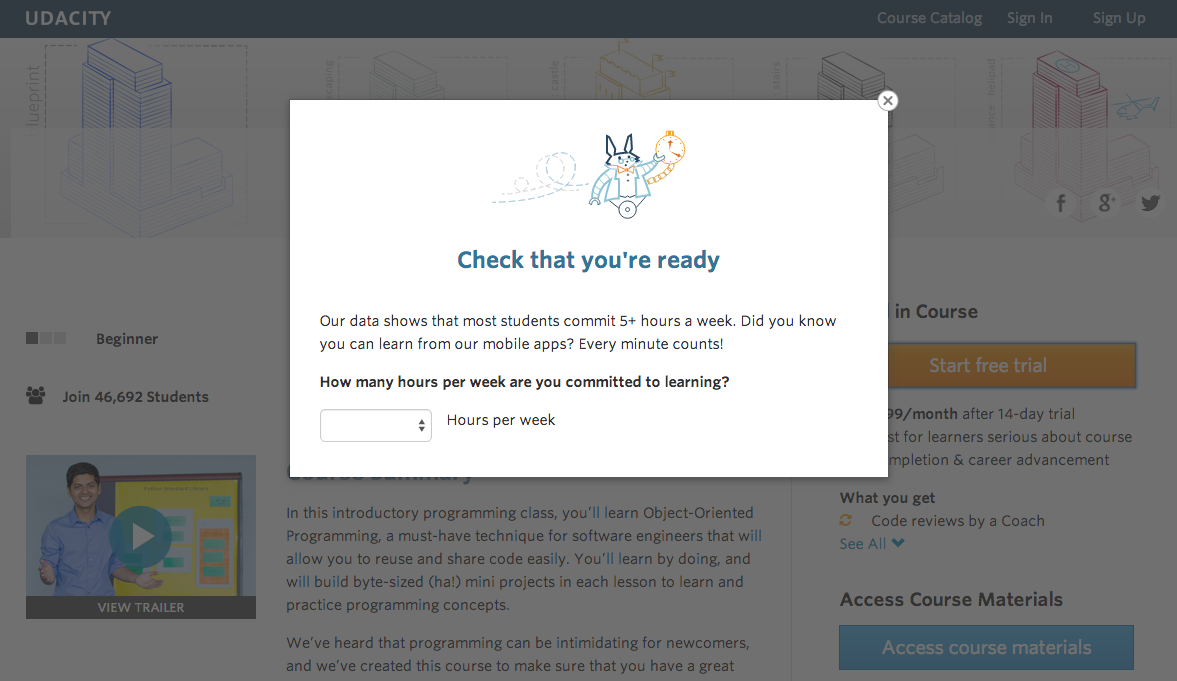

In [1]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Udacity%20AB%20testing%20data/AB%20testing%20data.csv'

ABtest_ = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(ABtest_.shape)
ABtest_.head()

(999, 10)


,Date,C-Pageviews,C-Clicks,C-Enrollments,C-Payments,E-Pageviews,E-Clicks,E-Enrollments,E-Payments,Unnamed: 9
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,7716.0,686.0,105.0,34.0,NaN
1,"Sun, Oct 12",9102.0,779.0,147.0,70.0,9288.0,785.0,116.0,91.0,NaN
2,"Mon, Oct 13",10511.0,909.0,167.0,95.0,10480.0,884.0,145.0,79.0,NaN
3,"Tue, Oct 14",9871.0,836.0,156.0,105.0,9867.0,827.0,138.0,92.0,NaN
4,"Wed, Oct 15",10014.0,837.0,163.0,64.0,9793.0,832.0,140.0,94.0,NaN


### Is this tidy data?

Why or why not???

No, multiple observations per row!



I am not going to go through the steps I used to convert the data from a summary table to the tidy data format, but [you can see them here](https://colab.research.google.com/drive/1D6i7dW3amXAY6R4I-_Q7a0ginSMM1Vfu?usp=sharing). 



In [2]:
#Import data in "tidy" by-pageview format


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Udacity%20AB%20testing%20data/AB_test_clicks.csv'

ABtest = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(ABtest.shape)
ABtest.head()

(690203, 3)


,Pageview,Group,Click
0,0,Control,1
1,1,Control,1
2,2,Control,1
3,3,Control,1
4,4,Control,1


Group = Control or Experimental depending on the screen viewed

Click = 0 if the individual did not click through, 1 = if the individual did click through

<details>
    <summary style="display:list-item"> <b>What is our goal?</b> </summary>
    To determine if there is an association between the two screens that the two audiences saw. 

### Note
A chi-square test *always* tests the null hypothesis that there ***is no*** relationship between two variables vs. the alternative hypothesis that there ***is*** a relationship between the two variables.


Therefore, in this example

<details>
    <summary style="display:list-item"> <b> Ho: </b></summary>
    There is no relationship between the web text and clickthroughs.
</details>


<details>
    <summary style="display:list-item"> <b> Ha: </b></summary>
    There is a relationship between the web text and clickthroughs.
</details>

To start, let's look at the frequency and relative frequency of the experimental conditions.

In [8]:
#Frequency of experiment group

group_freq = ABtest['Group'].value_counts()
print(group_freq)

Control       345543
Experiment    344660
Name: Group, dtype: int64


In [9]:
#Relative frequency of experiment group.  Multiply by 100 to convert from proportions to percents

group_perc = ABtest['Group'].value_counts(normalize=True)*100
print(group_perc)

Control       50.063967
Experiment    49.936033
Name: Group, dtype: float64


Now let's look at the frequency and relative frequency of clickthroughs on this screen (ignoring what screen the potential student saw).

In [11]:
#Frequency of clicks

click_freq = ABtest['Click'].value_counts()
print(click_freq)

0    633500
1     56703
Name: Click, dtype: int64


In [10]:
#Relative frequency of click group.  Multiply by 100 to convert from
#proportions to percents

click_perc = ABtest['Click'].value_counts(normalize=True)*100
print(click_perc)

0    91.784591
1     8.215409
Name: Click, dtype: float64


Out of the many, many page views, there was a clickthrough rate of about 8.2 during the time of the experiment.

If both the control group and the experimental group have a clickthrough rate of about 8.2%, we would say that the web text ___________ associated with the likelihood a person would click through.

However - for example - if the rate of clickthrough in the control group was much higher (say, 14%) than the clickthrough rate in the experimental group (say, 2%), then we'd say that the web text ___________ associated with the likelihood a person clicked through.

Now we want to look at the joint distribution of experimental condition and clickthrough.

In [14]:
#Joint distribution
joint_distribution = pd.crosstab(index=ABtest['Group'], columns = ABtest['Click'])
print(joint_distribution)

Click            0      1
Group                    
Control     317165  28378
Experiment  316335  28325


So... is there a relationship between web text and clickthroughs? Perhaps. How do you confirm this?

Let's begin by including the marginal distribution of each variable.  We actually calculated those before, but we can add them to the "margins" of the two-way table (hence the name marginal distribution) so we can view how many people clicked through and how many people were in each experiment group overall.

In [16]:
#Marginal distribution
marginal_distribution = pd.crosstab(index=ABtest['Group'], columns = ABtest['Click'], margins=True)
print(marginal_distribution)

Click            0      1     All
Group                            
Control     317165  28378  345543
Experiment  316335  28325  344660
All         633500  56703  690203


But what we really want to know is "Of people who saw each screen, what proportion clicked through?"  We can compare those proportions and see if they are the same or different.

We use "normalize = index" to tell Python that we want to compute the proportion of individuals who did and did not click through by the row variable (what Python calls the index variable).  

In statistical terminology, we call this the ***conditional distribution***.  We are computing the distribution of clickthrough *conditional* on what screen the student viewed.

In [17]:
#Conditional distribution
#Multiply by 100 again to work with percents rather than proprotions.
conditional_distribution = pd.crosstab(index=ABtest['Group'], columns = ABtest['Click'], normalize='index')*100
#NORMAlIZE=TRUE normalizes against ENTIRE DATAFRAME
print(conditional_distribution)


Click               0         1
Group                          
Control     91.787419  8.212581
Experiment  91.781756  8.218244


The proportions of clickthroughs in the two groups are very similar.  However, there are so many page views, the difference in the clickthrough rates might be statistically significantly different.

Let's make a side-by-side bar plots to visualize the relationship between experimental group and click-through.


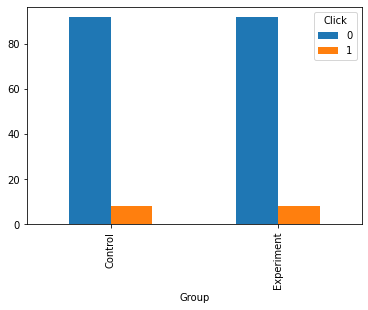

In [19]:
conditional_distribution.plot(kind='bar');

#Objective - Use a chi-square test for independence to test for a statistically significant association between two categorical variables

#Objective - Use a chi-square test for independence to draw the correct conclusions about the null and alternative hypothesis

That's where the Chi-Square test comes in.

As a reminder:

**Ho:** There ***is no*** relationship between screen view and clickthrough.

**Ha:** There ***is*** a relationship between screen view and clickthrough.

Just like in the t-test examples, if the p-value is ***LESS THAN*** the significance level, we will **REJECT** the null hypothesis.  If the p-value is ***GREATER THAN*** the significance level, we will ***FAIL TO REJECT***.

We import the chi-square function (chi2_contingency) from scipy.stats.  

**Take a very close look at the entry in the contingency table function**. It is the *table* we created above, not just the two variables of interest.

The chi2_contingency function has a lot of output, but we are most interested in the p-value, which we are calling p below.  

In [26]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(joint_distribution)
print("Chi Stat:", stat)
print("p-value:", p)
print("DOF:", dof); print()
print("Expected Values (if there were no relationship):")
print(pd.DataFrame(expected, index=joint_distribution.index, columns=joint_distribution.columns))

#print(p)

Chi Stat: 0.006606036478633042
p-value: 0.9352212452988706
DOF: 1

Expected Values (if there were no relationshup):
Click                   0             1
Group                                  
Control     317155.228969  28387.771031
Experiment  316344.771031  28315.228969


Let's interpret each of the parameters:

g = 

p = 

dof = 

expctd = 

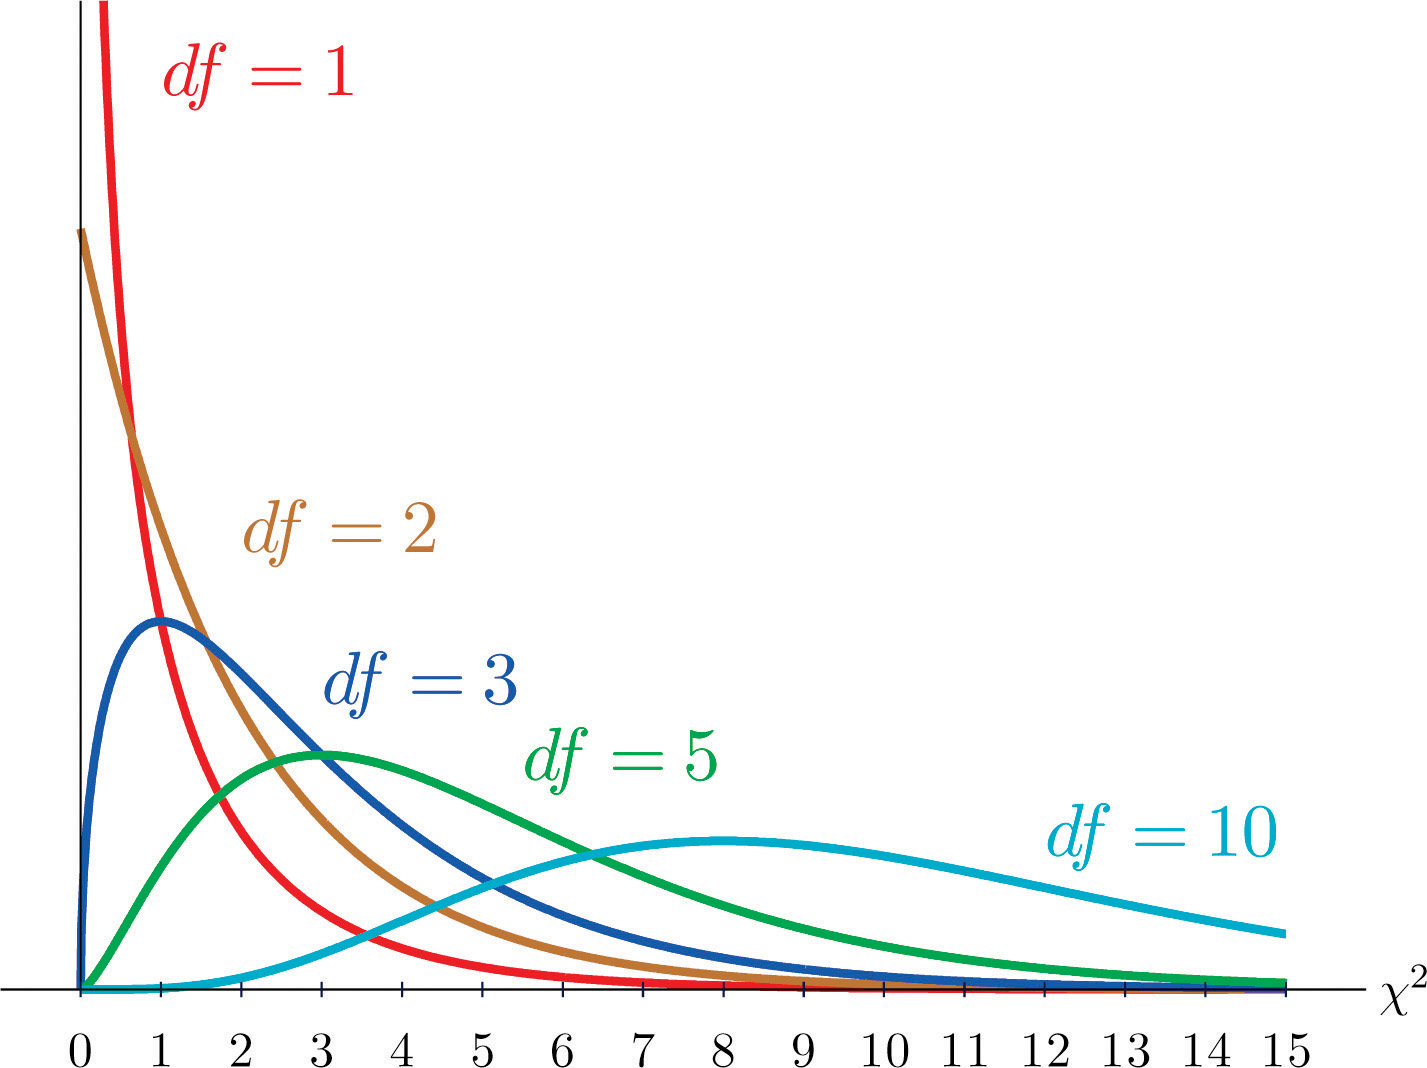


<details>
    <summary style="display:list-item"> <b> What does it mean if DOF increases?</b></summary>
    More columns and more rows. This makes it harder to get a smaller p_value.
</details>


<details>
    <summary style="display:list-item"> <b> Will it be easier or harder to reject Ho as the number of df increases</b></summary>
    Harder to reject the null hypothesis. 


We ***fail to reject*** the null hypothesis and conclude that there ***is no*** association between the screen the individual was shown and clicking through.



Note that that doesn't tell us about the rate of enrollments or payments, though.  We'll get to that later.

## Titanic Example

In the early hours of April 15, 1912, the unsinkable ship RMS Titanic sank when it struck an iceberg, killing more than half of the passengers and crew aboard. 

The Titanic.csv dataset contains demographic information for 889 of those passengers as well as a record of whether or not each passenger survived. 





#### Our goal is to determine if there is a relationship between ticket class and passenger survival on the Titanic.

A Chi-square test *always* tests the null hypothesis that there is *no* relationship between two variables vs. the alternative hypothesis that there *is* some relationship between the two variables.


Therefore, in this exmaple

**Ho:** There is no relationship between passenger class and survival rate

**Ha:** There is a relationship between passenger class and survival rate

In [27]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Titanic.csv'

Titanic = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(Titanic.shape)
Titanic.head()

(887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Survived = 0 means the passenger did not survive and 
Surivived = 1 means the passenger did survive.

Pclass = 1, 2, 3 indicates the passenger had a 1st, 2nd or 3rd class ticket, respectively.

To start, let's look at the freqeuncy and relative frequency of surival on the Titanic.

In [28]:
#Frequency of survival

survive_freq = Titanic['Survived'].value_counts()
print(survive_freq)

0    545
1    342
Name: Survived, dtype: int64


In [29]:
#Relative frequency of survival.  Multiply by 100 to convert from
#proportions to percents


survive_perc = Titanic['Survived'].value_counts(normalize=True)*100
print(survive_perc)

0    61.443067
1    38.556933
Name: Survived, dtype: float64


About 61% of passengers did not survive and 39% did.


Now let's look at the frequency and relative frequency of ticket class.


In [33]:
ticket_freq = Titanic['Pclass'].value_counts().sort_index()
print(ticket_freq)

1    216
2    184
3    487
Name: Pclass, dtype: int64


In [34]:
ticket_perc = Titanic['Pclass'].value_counts(normalize=True).sort_index()*100
print(ticket_perc)

1    24.351747
2    20.744081
3    54.904171
Name: Pclass, dtype: float64


Now let's look at the joint distribution of survival by passenger class.  That means we want to see how many people fall into each combination of the two categories.

In [37]:
joint_distribution = pd.crosstab(Titanic['Pclass'], Titanic['Survived']) #ORDER MATTERS
print(joint_distribution)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         368  119


So... is there a relationship between ticket class and survival?  It can be somewhat hard to tell.  More 3rd class passengers died, but there were more 3rd class passengers to begin with. What to do?

Let's begin by including the marginal distribution of each variable.  We actually calculated those before, but we can add them to the "margins" of the two-way table (hence the name marginal distribution) so we can remember how many people survived overall and how many people were in each ticket class overall.

In [38]:
marginal_distribution = pd.crosstab(Titanic['Pclass'], Titanic['Survived'], margins=True) #ORDER MATTERS
print(marginal_distribution)

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         368  119  487
All       545  342  887


But what we really want to know is "Of people in each ticket class, what proportion survived?"  We can compare those proportions and see if they are the same or different.

We use "normalize = index" to tell Python that we want to compute the proportion of individuals who did and did not survive by the row variable (what Python calls the index variable).  

In statistical terminology, we call this the conditional distribution.  We are computing the distribution of survival *conditional* on what passenger class they were in.

In [39]:
#Multiply by 100 again to work with percents rather than proportions.
conditional_distribution = pd.crosstab(Titanic['Pclass'], Titanic['Survived'],normalize='index') #ORDER MATTERS
print(conditional_distribution)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.755647  0.244353


We can see that about 63% of 1st class ticket holders survived while 37% did not.  Compare this to 47% of 2nd class ticket holders who survived and 24% of 3rd class ticket holders who did not survive.

Let's make a side-by-side bar plots to visualize the relationship between passenger class and survival

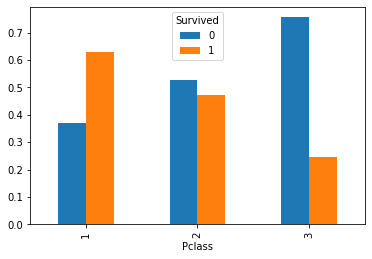

In [41]:
#Visualize the relationship between passenger class and survival using a bar plot

conditional_distribution.plot(kind='bar');


But because we haven't actually computed a statistical test, we don't know for sure if there is strong evidence that there is a relationship between ticket class and survival.  That's where the Chi-Square test comes in.

As a refresher:

**Ho:** There ***no relationship*** between passenger ticket class and survival on the Titanic.

**Ha:** There ***is a relationship*** between passenger ticket class and survival on the Titanic.

Just like in the t-test examples, if the p-value is less than the significance level, we will reject the null hypothesis.  If the p-value is greater than the significance level, we will fail to reject.

We import the chi-square function (chi2_contingency) from scipy.stats.  

**Take a very close look at the entry in the contingency table function**. It is the *table* we created above, not just the two variables of interest.

The chi2_contingency function has a lot of output, but we are most interested in the p-value, which we are calling p below.  

In [44]:
stat, p, dof, expected = chi2_contingency(joint_distribution)
print("Chi Stat:", stat)
print("p-value:", p)
print("DOF:", dof); print()
print("Expected Values (if there were no relationship):")
print(pd.DataFrame(expected, index=joint_distribution.index, columns=joint_distribution.columns))

Chi Stat: 101.21674250560609
p-value: 1.0496962042983216e-22
DOF: 2

Expected Values (if there were no relationship):
Survived           0           1
Pclass                          
1         132.717024   83.282976
2         113.055242   70.944758
3         299.227734  187.772266


Note the scientific notation in our result.

p = ______.  

This is a super small p-value.  We would reject the null hypothesis at any significance level and conclude there is a relationship between the two variables.

So... we definitely think that passenger ticket class is related to survival.  That makes sense and is backed up by the conditional distribution we calculated earlier.



---



Now let's look at passenger sex and survival?  Were women and children really the first ones in the lifeboats?

Note that children are not specifically identified in this data set. We cannot conclude whether children were prioritized.


First, is a chi-square test appropriate for these data?

Answer: Yes, two categorical variables are being compared wrt their expected values

What is the distribution of passenger sex on the Titanic?

In [ ]:
#Frequency of gender



#Relative frequency of gender



Passengers on the Titanic were...

Refresh your memory by calculating the distribution of passenger survival.

In [ ]:
#Frequency of survival



#Relative frequency of survival



Survival results: 

Calculate the joint distribution of passenger sex and survival.  Add on the margins.  Can you draw any initial conclusions about the relationship between passenger sex and survival?

In [47]:
#Joint distribution and joint distribution adding margins.
joint_distribution = pd.crosstab(Titanic['Sex'], Titanic['Survived'])
print(joint_distribution)

Survived    0    1
Sex               
female     81  233
male      464  109


Results: 

Calculate the distribution of survival conditional on passenger sex.  What does this tell you?

In [49]:
#Conditional distribution of survival by passenger sex
conditional_distribution = pd.crosstab(Titanic['Sex'], Titanic['Survived'], normalize='index')*100
print(conditional_distribution)

Survived          0          1
Sex                           
female    25.796178  74.203822
male      80.977312  19.022688


Results: 

Conduct the chi-square test.  What are our null and alternative hypotheses?

**Ho:**

**Ha:** 

In [50]:
#chi-square test

stat, p, dof, expected = chi2_contingency(joint_distribution)
print("Chi Stat:", stat)
print("p-value:", p)
print("DOF:", dof); print()
print("Expected Values (if there were no relationship):")
print(pd.DataFrame(expected, index=joint_distribution.index, columns=joint_distribution.columns))

Chi Stat: 258.3912607678978
p-value: 3.847574039733745e-58
DOF: 1

Expected Values (if there were no relationship):
Survived           0           1
Sex                             
female    192.931229  121.068771
male      352.068771  220.931229


What is the p-value?  What do we conclude (at the 0.05 significance level) about the relationship between passenger sex and survival?

Results: 

Create a side-by-side bar plot illustrating the relationship of passenger sex and survival.  

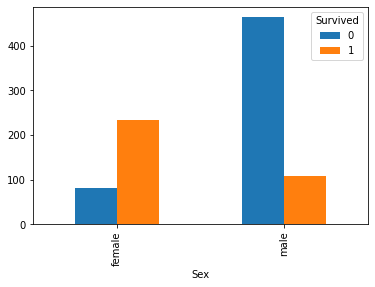

In [52]:
joint_distribution.plot(kind='bar');

# Bonus: Feature Engineering to Determine Family Size on the Titanic

As a proxy, how many people have the same last name?

In [54]:
#Print the first 5 observations
Titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [62]:
Titanic['Last Name'] = Titanic['Name'].str.split().str[-1]
print( Titanic['Last Name'].value_counts()); print()
print( (Titanic['Last Name'].value_counts() > 1).sum() )

Andersson     9
Sage          7
Johnson       6
Goodwin       6
Panula        6
             ..
Morrow        1
Harrington    1
Pickard       1
Somerton      1
Davidson      1
Name: Last Name, Length: 664, dtype: int64

133
